<h1> Lab 4 - Supervised classification - Part 2 -  Lab report

**Specialization :** Networks and Telecommunications Engineering , 4th Grade

**Academic year :** 2023 - 2024

**Students:** Achour Oussama - Cherni Anas - Hammouda Anis

# Data pre-processing

Importing data

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import plot_tree


bank_data = pd.read_csv("https://raw.githubusercontent.com/AchourOussama/Machine-learning/main/Lab4/bank_cleaned.csv")
bank_data.head()


,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


processing data

In [74]:
#dropping the 'unamed:0' column
bank_data.drop(['Unnamed: 0'], axis=1, inplace=True)


In [75]:
#column with null entry values
bank_data.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
response           0
response_binary    0
dtype: int64

Describing data

In [76]:
#data statistics
bank_data.describe()


,age,balance,day,duration,campaign,pdays,previous,response_binary
count,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000
mean,40.790676,1073.981807,15.863666,4.308949,2.774149,32.248304,0.436791,0.113587
std,10.475473,1712.556186,8.313608,4.305823,3.104177,90.738402,1.572342,0.317313
min,18.000000,-6847.000000,1.000000,0.100000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,64.000000,8.000000,1.730000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,421.000000,16.000000,3.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1333.000000,21.000000,5.300000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,10443.000000,31.000000,81.970000,58.000000,871.000000,55.000000,1.000000


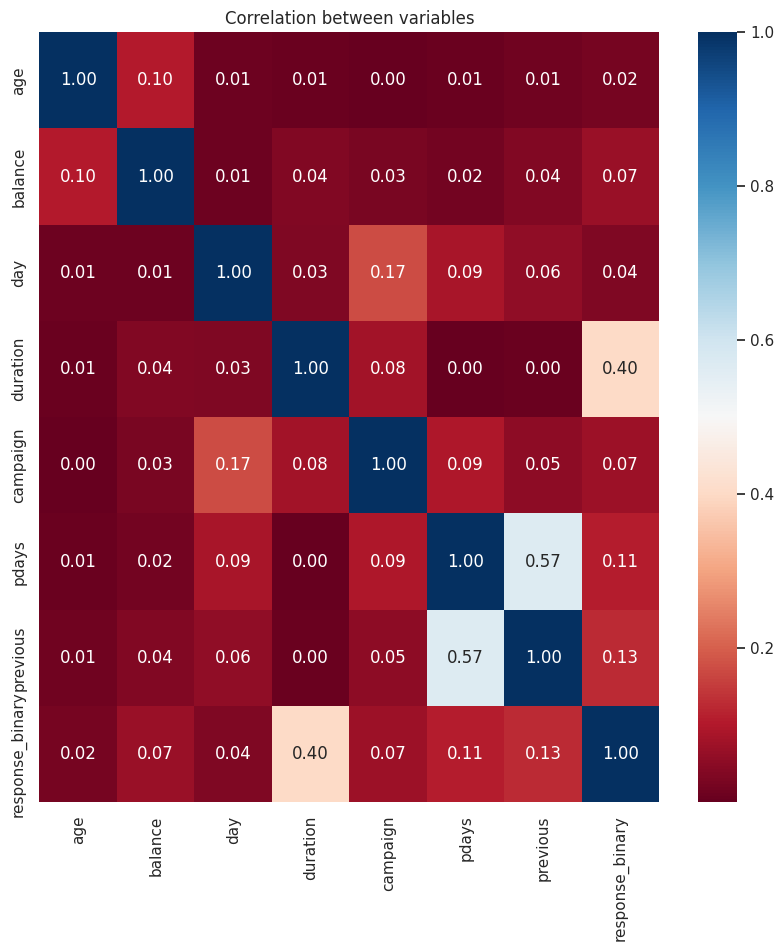

In [77]:
 # correlation matrix
 #selcting only numerical columns
numeric_features = bank_data.select_dtypes(include=[int, float])
corr_matrix = numeric_features.corr()
#we take absolute values of the correlation , sin
corr_matrix = corr_matrix.abs()
sns.set(rc={'figure.figsize': (10, 10)})
sns.heatmap(corr_matrix, cmap="RdBu", annot=True, fmt=".2f")
plt.title("Correlation between variables")
plt.savefig("Correlation_matrix.png")
plt.show()

<ipython-input-78-c30eb430997d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[col],color='blue', bins=50)


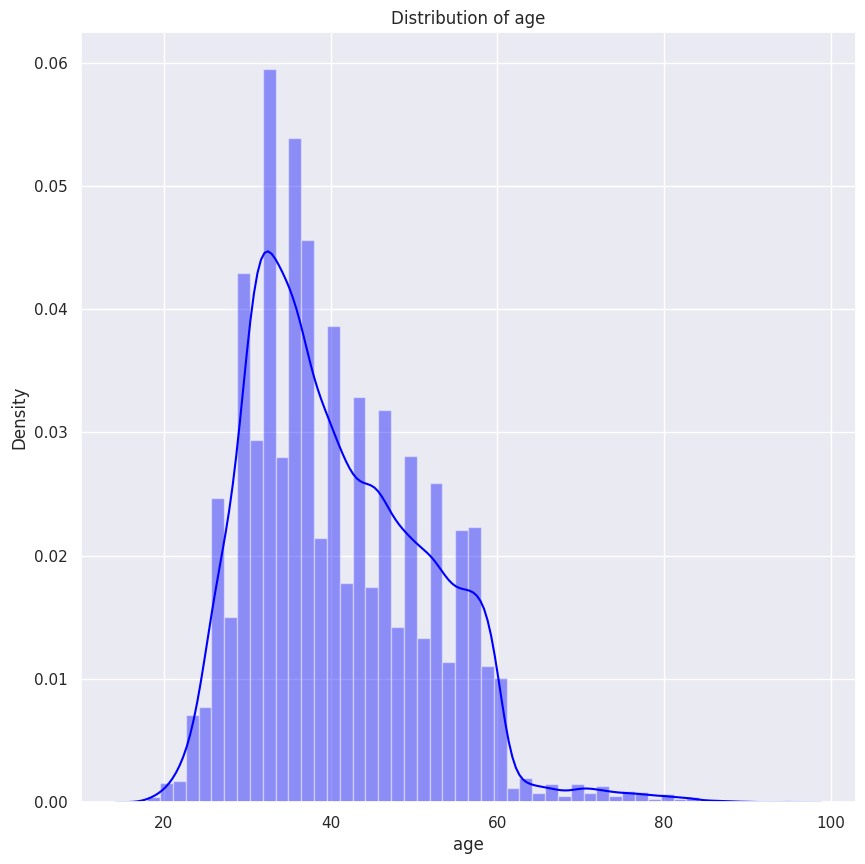

<ipython-input-78-c30eb430997d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[col],color='blue', bins=50)


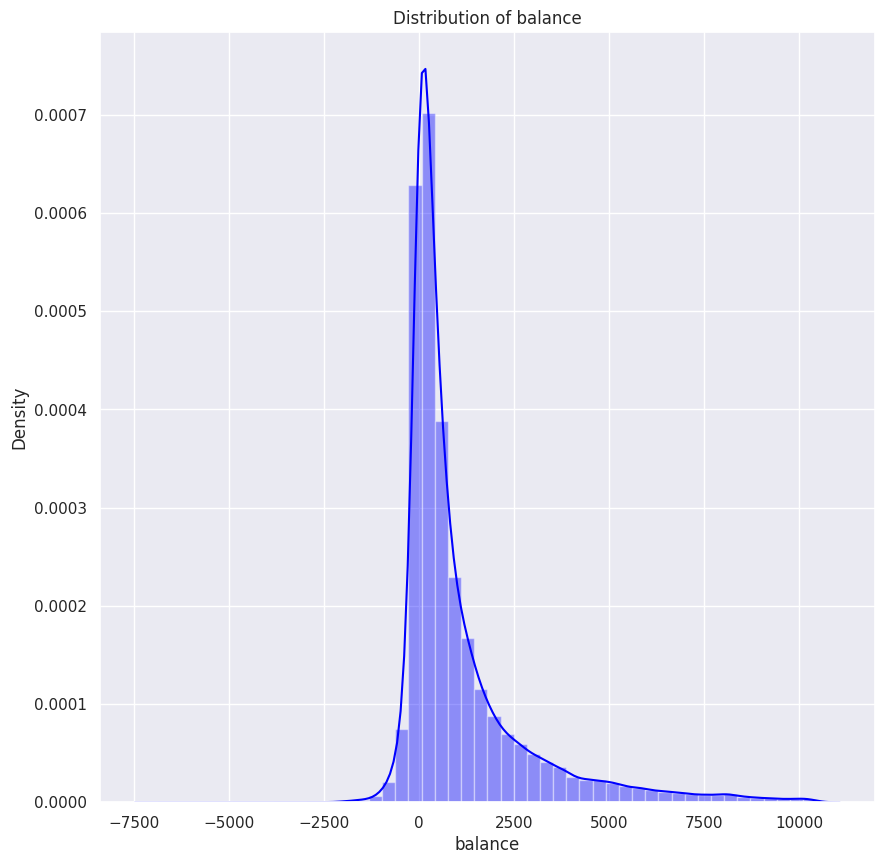

<ipython-input-78-c30eb430997d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[col],color='blue', bins=50)


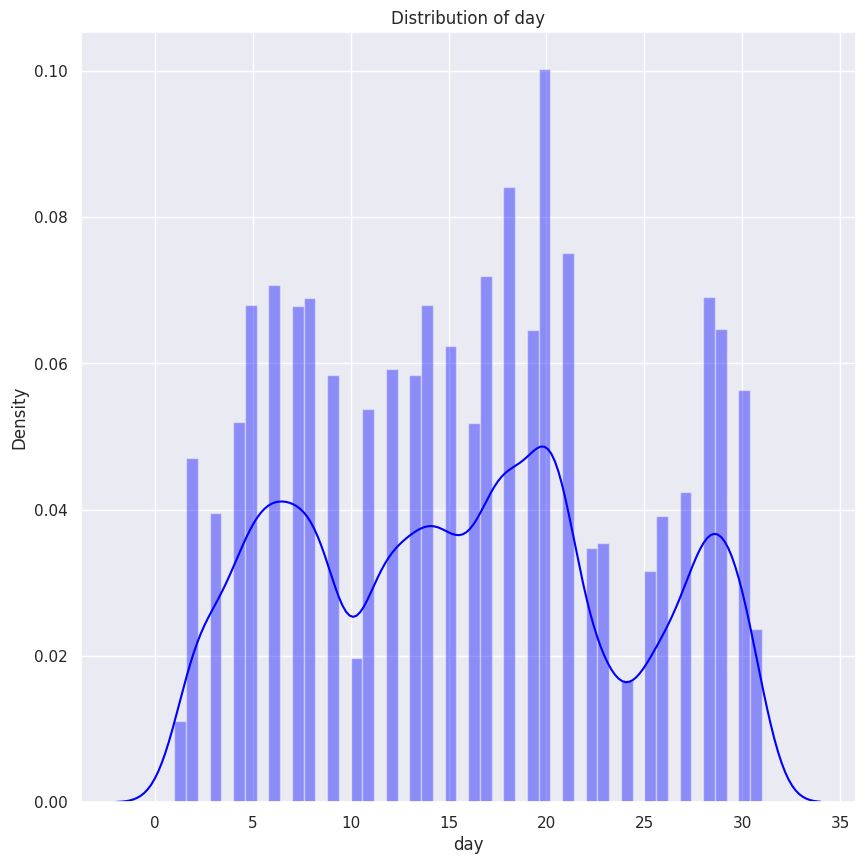

<ipython-input-78-c30eb430997d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[col],color='blue', bins=50)


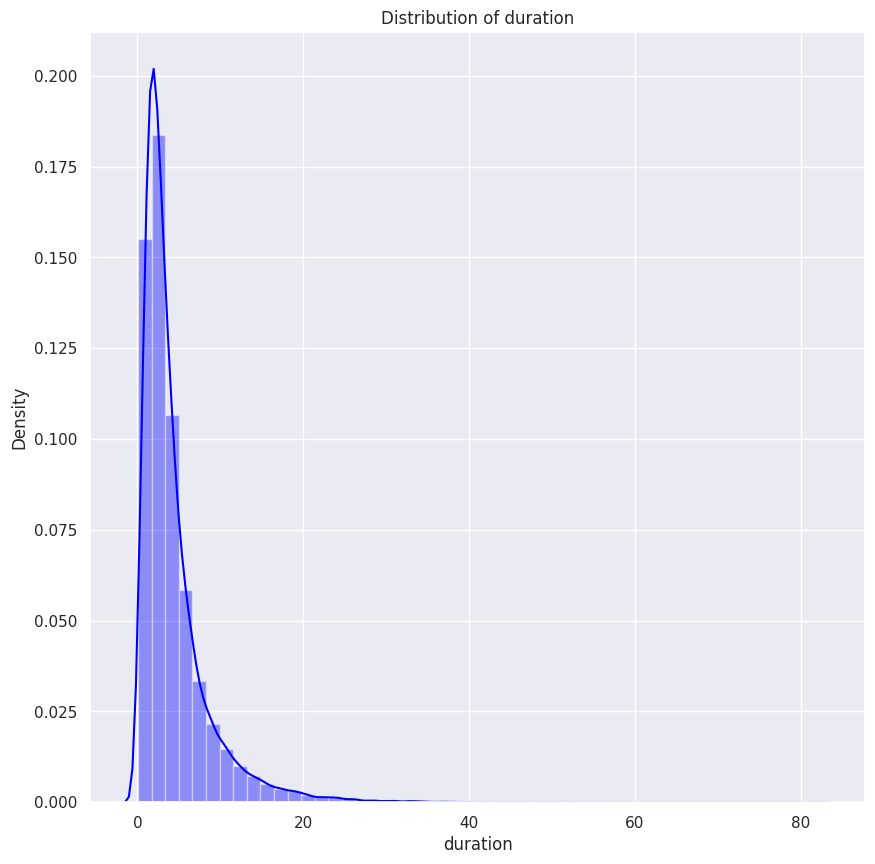

<ipython-input-78-c30eb430997d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[col],color='blue', bins=50)


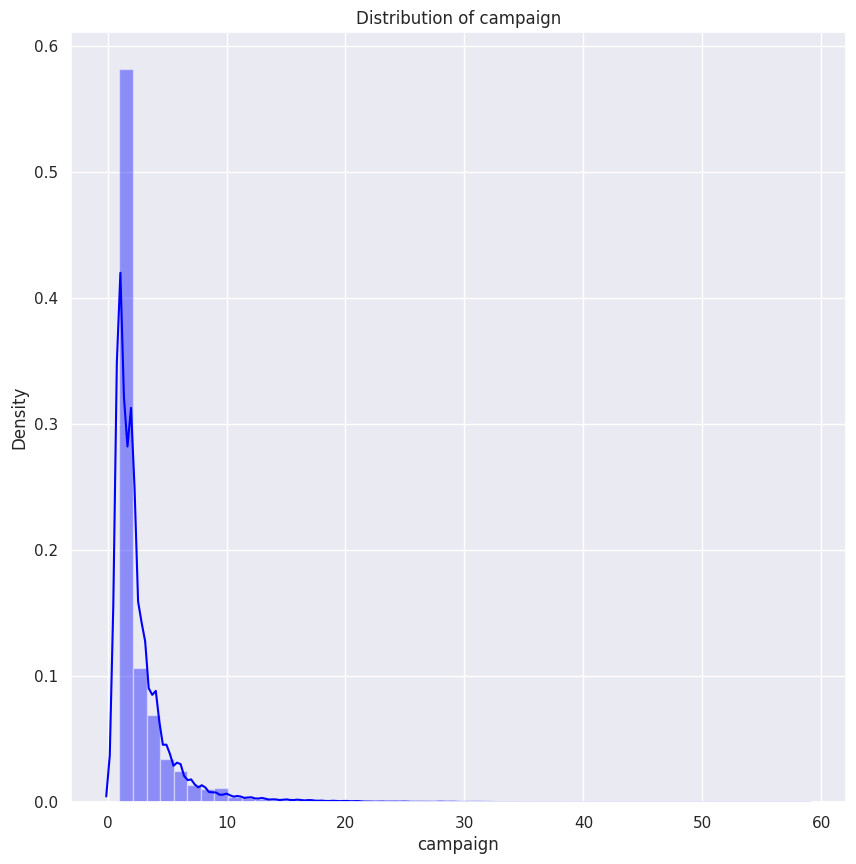

<ipython-input-78-c30eb430997d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[col],color='blue', bins=50)


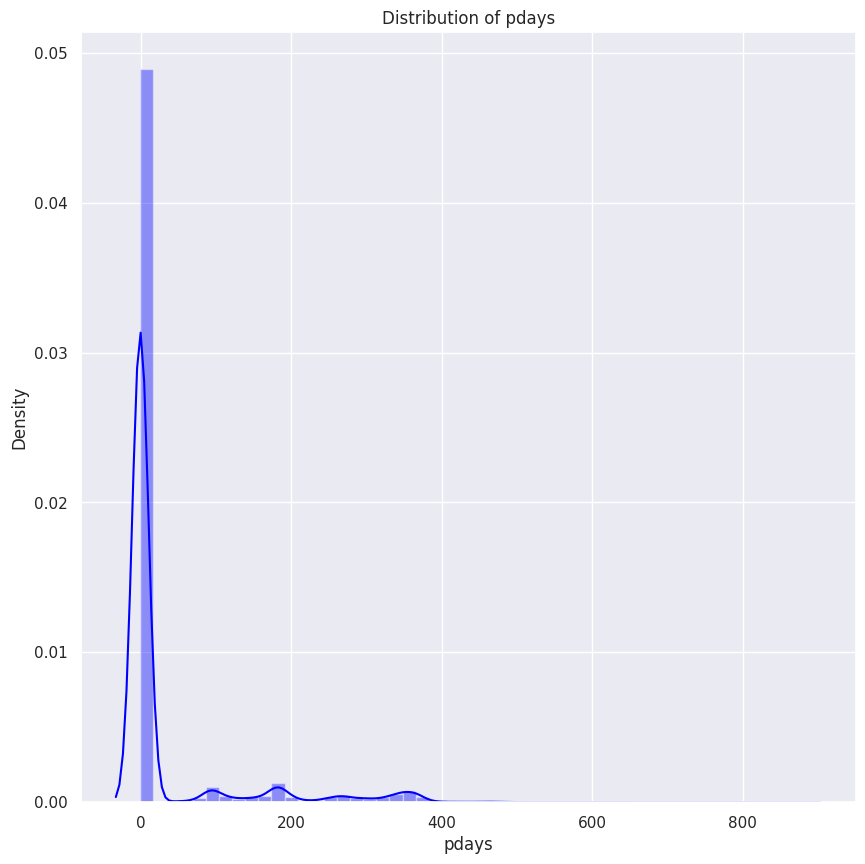

<ipython-input-78-c30eb430997d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[col],color='blue', bins=50)


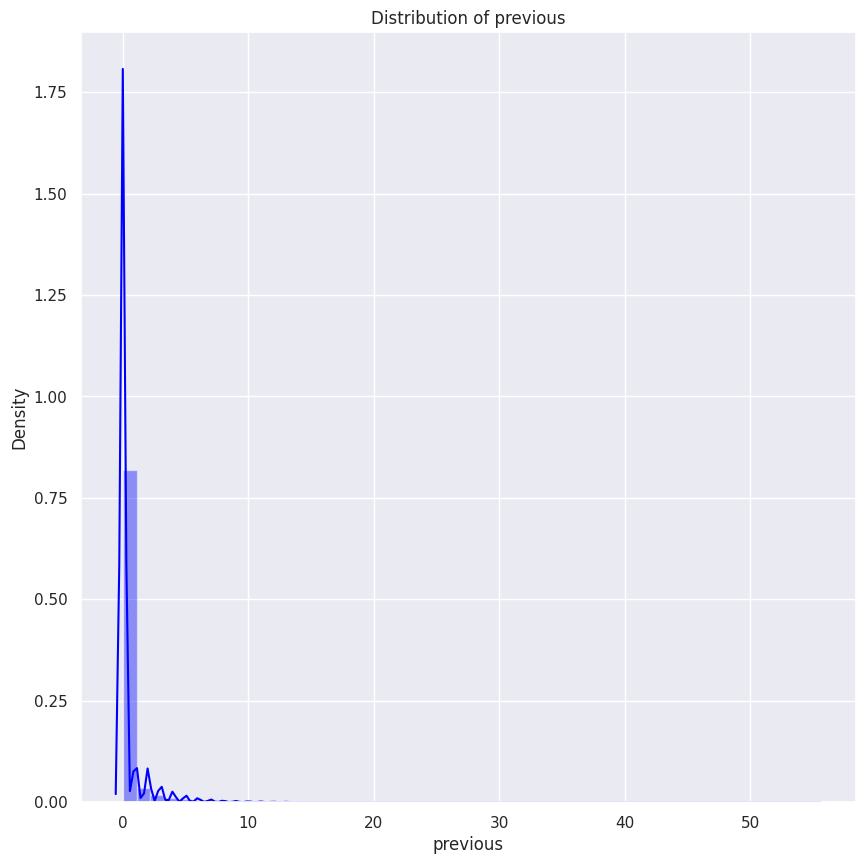

<ipython-input-78-c30eb430997d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[col],color='blue', bins=50)


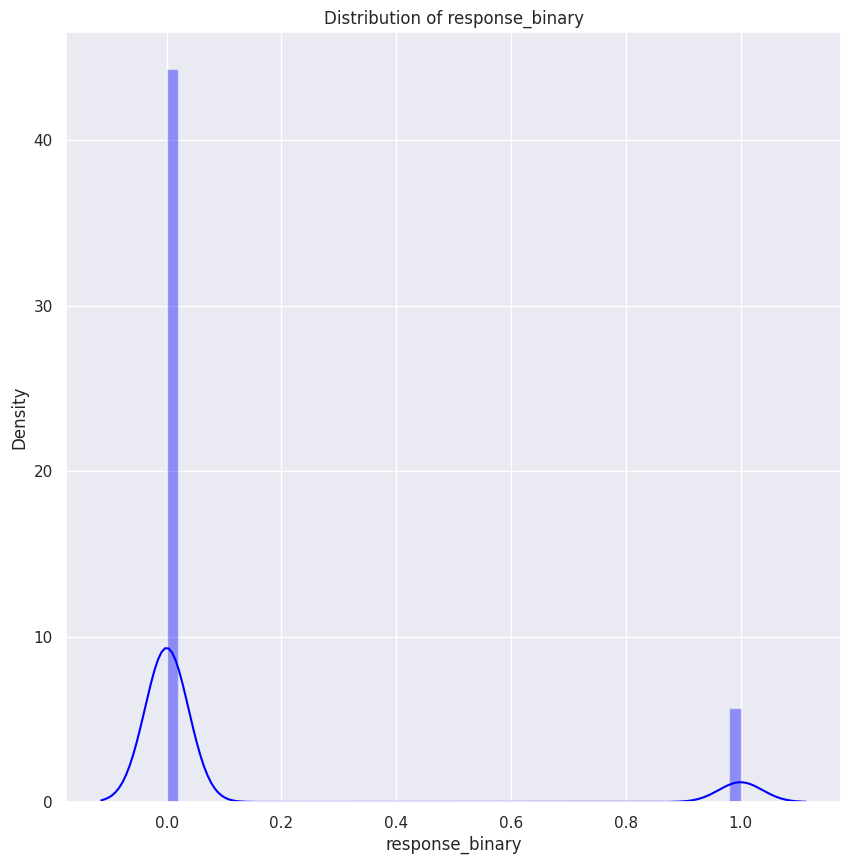

In [78]:
for col in numeric_features.columns:
    plt.figure()
    sns.distplot(bank_data[col],color='blue', bins=50)
    plt.title("Distribution of {}".format(col))
    plt.savefig("Distribution of {}".format(col))
    plt.show()

performing one-hot encoding on categorical data : Each categorical variable with multiple categories is replaced by binary columns, where each column represents a category

In [79]:
bank_data = pd.get_dummies(bank_data, drop_first=True)
bank_data.head()

,age,balance,day,duration,campaign,pdays,previous,response_binary,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_success,poutcome_unknown,response_yes
0,58,2143,5,4.35,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,44,29,5,2.52,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,33,2,5,1.27,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,35,231,5,2.32,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,28,447,5,3.62,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


# Building the model

Seperating features and labels

In [80]:
Y = bank_data["response_binary"]
X = bank_data.drop(["response_binary"], axis=1)


Splitting data : Training data and Testing data

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


Training

In [85]:

# Specifying 'n-estimators' (number of decision trees in the forest)
# and 'max_depth' (maximal depth of the decision treees)

param_dist = {'n_estimators': randint(1,20), 'max_depth': randint(1,10)}
# creating an intance of the RandomForestClassifier
rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5)
# training the model
rand_search.fit(X_train, y_train)
# geting the best RandomForestClassifier model (the one with the best optimal hyperparameters)
best_rf = rand_search.best_estimator_
print('Best hyperparameters:', rand_search.best_params_)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 16}


# Evaluating the model

In [86]:
y_pred = best_rf.predict(X_test)
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix :\n ", metrics.confusion_matrix(y_test, y_pred))


Accuracy :  0.9999183873337142
Confusion matrix :
  [[10825     0]
 [    1  1427]]


 # Visualization

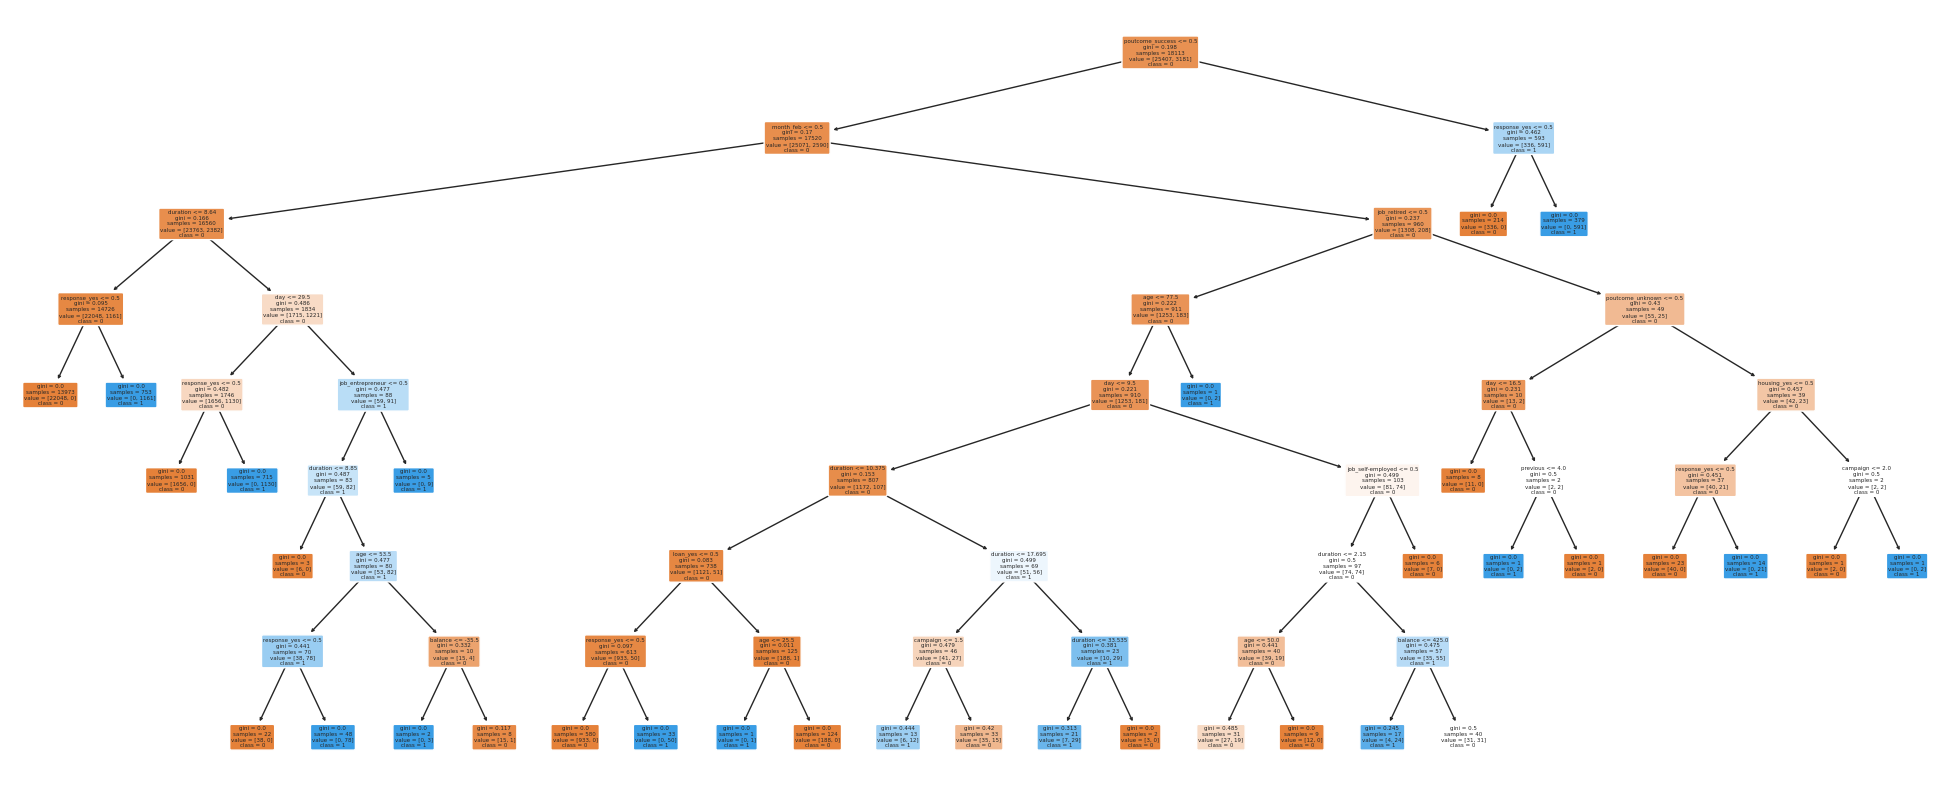

In [87]:
plt.figure(figsize=(25, 10))
plot_tree(best_rf.estimators_[0], filled=True, rounded=True, class_names=['0', '1'], feature_names=X.columns)
plt.savefig("RandomForestTree.png")

plt.show()
